### Instalar bibliotecas

In [10]:
%conda install numpy -y
%conda install!wget -c https://www.dropbox.com/s/21kk53sgenipmob/Real%20estate.csv?dl=0 -O real_estate.csv pandas -y
%conda install matplotlib -y
%conda install scikit-learn -y

Channels:
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.

usage: conda [-h] [-v] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'install!wget' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'content-trust', 'doctor', 'repoquery', 'env')
Channels:
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.

Channels:
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/ubuntu/miniconda3/envs/jupyter

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.2.0               |  py311h06a4308_0         527 KB
    libgfortran-ng-11.2

### Importar bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Realizar download do dataset

In [3]:
!wget -c https://www.dropbox.com/s/21kk53sgenipmob/Real%20estate.csv?dl=0 -O real_estate.csv

--2023-11-27 00:15:40--  https://www.dropbox.com/s/21kk53sgenipmob/Real%20estate.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/21kk53sgenipmob/Real%20estate.csv [following]
--2023-11-27 00:15:40--  https://www.dropbox.com/s/raw/21kk53sgenipmob/Real%20estate.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccccdefefe6ccd0cadf1c1c81a3.dl.dropboxusercontent.com/cd/0/inline/CIRt-qRQ16iyfHmEYNT1vzttk-poeC0Diy4uEF5wf8JoVxPIIpE4DG1eB-askhcH4s-gVBhmCwPMN_Xnh2FNGpC2rfoLGslfL3P0Ehnc-kyZ7Pra7fGyit4wljUmGFBX-LY/file# [following]
--2023-11-27 00:15:40--  https://uccccdefefe6ccd0cadf1c1c81a3.dl.dropboxusercontent.com/cd/0/inline/CIRt-qRQ16iyfHmEYNT1vzttk-poeC0Diy4uEF5wf8JoVxPIIpE4DG1eB-askhcH4s-gVBhmCwPMN_Xnh2FNGpC2rfoLGslfL3P0Ehn

### Primeira análise do arquivo

In [4]:
!head -10 real_estate.csv

In [5]:
!tail -10 real_estate.csv

In [6]:
!wc -l real_estate.csv

415 real_estate.csv


### Carregar dados com Pandas

In [7]:
real_estate_data = pd.read_csv("real_estate.csv")
real_estate_data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


### Visualizar relação entre Preço e Idade da casa

Text(0.5, 0, 'Idade')

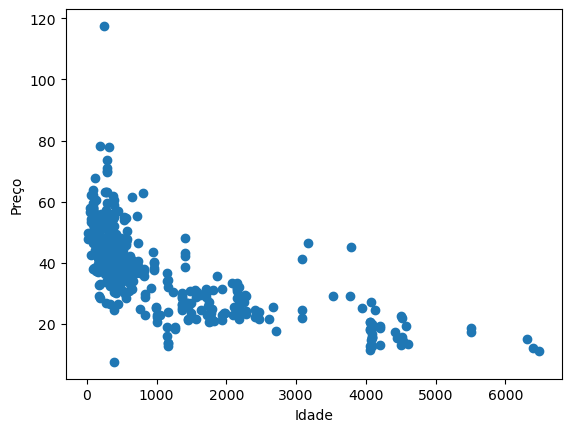

In [8]:
plt.scatter(x=real_estate_data.iloc[:,3], y=real_estate_data.iloc[:,7])
plt.ylabel("Preço")
plt.xlabel("Idade")

### Executar Regressão Linear

In [11]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [12]:
re_train, re_test = train_test_split(real_estate_data, train_size=0.7)

# atributos: "X2 house age" e "X3 distance to the nearest MRT station"
# alvo: "Y house price of unit area"

X_train = re_train.iloc[:,[2,3]] 
y_train = re_train.iloc[:,-1] 

X_test = re_test.iloc[:,[2,3]]
y_test = re_test.iloc[:,-1]

In [17]:
X_train.head()

,X2 house age,X3 distance to the nearest MRT station
175,30.2,472.1745
204,18.0,1414.8370
202,38.3,642.6985
303,38.3,439.7105
268,17.2,390.5684


### Treinar regressão linear

In [19]:
reg = linear_model.LinearRegression()
reg.fit(X=X_train, y=y_train)

/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and

LinearRegression()

In [20]:
reg.coef_

array([-0.24373523, -0.00742961])

In [21]:
reg.intercept_

50.16974191250756

### Testar a qualidade do modelo

In [22]:
from sklearn import metrics
y_pred = reg.predict(X_test)
print('MSE',metrics.mean_squared_error(y_test,y_pred))

MSE 98.14648157277428


/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and

# Exercicio

1. Testar combinações de variáveis para melhorar o desempenho do regressor do tutorial anterior;
1. Utilizar o dataset [Wine Quality](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/).
  1. Baixar dados relativos a Vinhos Tintos e Brancos;
  1. Criar modelos de regressão linear para cada um dos tipos de vinhos;
  1. Unir os dois datasets (para unir datasets utiliza esse [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#concatenating-objects) como referência.
  1. Criar um modelo de regressão linear para o dataset unificado;

In [23]:
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv --no-check-certificate

--2023-11-27 00:29:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv’

winequality-white.c     [    <=>             ] 258.23K   357KB/s    in 0.7s    

2023-11-27 00:29:33 (357 KB/s) - ‘winequality-white.csv’ saved [264426]



In [24]:
!head winequality-white.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
